In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import copy

import tensorflow as tf
from tensorflow import keras
from keras import models as kmod
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
FOLDER_PATH = "/content/drive/MyDrive/Master_AI/AIVP/Project/Data/"
FILE_PATH = "/content/drive/MyDrive/Master_AI/AIVP/Project/Data/mdi_modified"#apple_samsung.csv"
IMG_PATH = "/content/drive/MyDrive/Master_AI/AIVP/Project/Data/mobile_images/"


In [ ]:
LABEL = "Brand_id"

def setup_experiment(exp_id = 0):
  LABEL = "Brand_id"
  
  if(exp_id == 0):
    LABEL = "Condition_id"

  

In [ ]:
df = pd.read_csv(FILE_PATH, error_bad_lines=False)
df = df.reset_index(drop=True)

In [ ]:
#def splitt_dataset(dataset):
  #Get the specific train and test datasets
train_df = df.loc[df['Usage'] == 'Training']
valid_df = df.loc[df['Usage'] == 'Validation']
test_df = df.loc[df['Usage'] == 'Testing']
#return train, valid, test

In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.insert(8,'data',float)

In [ ]:
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
train_df.insert(8,'data',float)
valid_df.insert(8,'data',float)

In [ ]:
valid_df.head(25)

In [ ]:
for i in range(len(df.index)):
  try:
    img = mpimg.imread(IMG_PATH+df.iloc[i]["Image_File"])
    df.at[i,'data'] = img
    if((i%100) == 0):
      print(i)
  except:
    df.at[i,'Condition_id']=-1
    print('fail at ' + str(i))
    continue

In [ ]:
for i in range(len(train_df.index)):
  try:
    img = mpimg.imread(IMG_PATH+train_df.iloc[i]["Image_File"])
    #print('a')
    train_df.at[i,'data']= img
    if((i%100) == 0):
      print(i)
  except:
    train_df.at[i,'Condition_id']=-1
    print('fail at ' + str(i))
    continue

0
fail at 15
100
fail at 182
fail at 183
200
fail at 231
300
fail at 382
400
500
600
700
fail at 713
fail at 726
800
900


In [ ]:
for i in range(len(valid_df.index)):
  try:
    img = mpimg.imread(IMG_PATH+valid_df.iloc[i]["Image_File"])
    valid_df.at[i,'data']= img
    if((i%100) == 0):
      print(i)
  except:
    valid_df.at[i,'Condition_id']=-1
    print('fail at ' + str(i))
    continue

0
100


In [ ]:
df.drop( df[ df['Condition_id'] == -1 ].index , inplace=True)

In [ ]:
train_df.drop( train_df[ train_df['Condition_id'] == -1 ].index , inplace=True)
valid_df.drop( valid_df[ valid_df['Condition_id'] == -1 ].index , inplace=True)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [ ]:
train_df.head(25)

In [ ]:
df = df[df['Condition_id'] != -1]

In [ ]:
df.to_csv(SAVE_PATH)

In [ ]:
plt.imshow(df.at[1,'data'])

In [ ]:
def split_to_LaD(dataframe):
  labels_list = dataframe.pop('Brand_id')
  images_list = dataframe.pop('data')
  return images_list, labels_list

def df_LaD_to_arry(images_list,labels_list):

  images = np.reshape((images_list[0][:100,:140,:]),(1,100,140,3))
  labels = np.reshape(labels_list[0],1)
  for i in range(1,len(images_list)):
    #try:
    image = np.reshape((images_list[i][:100,:140,:]),(1,100,140,3))
    label = np.reshape(labels_list[i],1)
    #print(labels.shape)
    images = np.append(images,image, axis = 0)
    labels = np.append(labels,label)
    #except:
    #  continue

  images = images.astype(np.float)
  images = images / 255.0
  labels = labels.astype(np.float)

  return images, labels


In [ ]:
tr_ll, tr_il =  split_to_LaD(train_df)
va_ll, va_il =  split_to_LaD(valid_df)

In [ ]:
images, labels = df_LaD_to_arry(tr_ll, tr_il)
val_images, val_labels = df_LaD_to_arry(va_ll, va_il)

In [ ]:
train_labels_list = train_df.pop('Brand_id')
train_images_list = train_df.pop('data')

In [ ]:
images

In [ ]:
plt.imshow(images.at[0])

In [ ]:
plt.imshow(images.at[1])

In [ ]:
images[0].shape

In [ ]:
for i in range(len(images)):
  try:
    print(images[i].shape)
  except:
    continue

In [ ]:
images[1].shape

(107, 142, 3)

In [ ]:
images[2].shape

(107, 142, 3)

In [ ]:
images2 = np.stack((images_list[0][:100,:140,:], images_list[1][:100,:140,:], images_list[2][:100,:140,:]), axis = 0)


In [ ]:
imgasd = np.reshape((images_list[1][:100,:140,:]),(1,100,140,3))

In [ ]:
labels_list[7]

0

In [ ]:
images = np.reshape((images_list[0][:100,:140,:]),(1,100,140,3))
labels = np.reshape(labels_list[0],1)
for i in range(1,len(images_list)):
  try:
    image = np.reshape((images_list[i][:100,:140,:]),(1,100,140,3))
    label = np.reshape(labels_list[i],1)
    print(label.shape)
    images = np.append(images,image, axis = 0)
    labels = np.append(labels,label)
    print('d')
    print(i)
  except:
    continue

In [ ]:
images.shape

(1260, 100, 140, 3)

In [ ]:
labels = np.reshape(labels, (len(labels),1))

In [ ]:
labels

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
train_set = tf.data.Dataset.from_tensor_slices((images.reshape(len(labels),100,140,3),labels)).shuffle(1000).batch(32)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import models as kmod
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
def model_VGG():
  model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(100, 140, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax'),
    ])
  return model, 'VGG'

In [ ]:
model_vgg = model_VGG()

model_vgg[0].compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits = False),#loss='mse',
              metrics=['accuracy'])

In [ ]:
print(model_vgg[0].summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 140, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 140, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 70, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 70, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 70, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 35, 32)       0         
 2D)                                                    

In [ ]:
history = (model_vgg[0].fit(train_set,#train_images, train_labels,
                               epochs = 50,
                               validation_data = (val_images.reshape(len(val_labels),100,140,3),val_labels),
                               callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10, restore_best_weights = True)))

Epoch 1/50
30/30 [==============================] - 13s 101ms/step - loss: 0.8150 - accuracy: 0.5552 - val_loss: 0.6609 - val_accuracy: 0.6139
Epoch 2/50
30/30 [==============================] - 2s 62ms/step - loss: 0.6673 - accuracy: 0.6151 - val_loss: 0.7282 - val_accuracy: 0.5253
Epoch 3/50
30/30 [==============================] - 2s 63ms/step - loss: 0.6472 - accuracy: 0.6204 - val_loss: 0.6262 - val_accuracy: 0.6266
Epoch 4/50
30/30 [==============================] - 2s 64ms/step - loss: 0.6118 - accuracy: 0.6540 - val_loss: 0.5552 - val_accuracy: 0.7152
Epoch 5/50
30/30 [==============================] - 2s 62ms/step - loss: 0.5456 - accuracy: 0.7329 - val_loss: 0.5401 - val_accuracy: 0.7089
Epoch 6/50
30/30 [==============================] - 2s 63ms/step - loss: 0.5240 - accuracy: 0.7497 - val_loss: 0.5326 - val_accuracy: 0.7405
Epoch 7/50
30/30 [==============================] - 2s 63ms/step - loss: 0.4817 - accuracy: 0.7676 - val_loss: 0.6865 - val_accuracy: 0.6519
Epoch 8/50


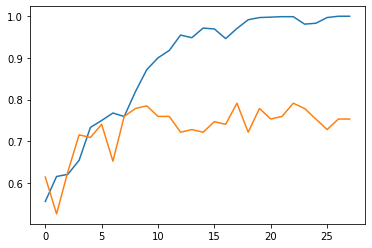

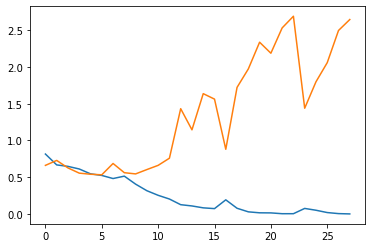

In [ ]:
element = 'accuracy'

plt.plot(history.history[element], label = element + '_' + model_vgg[1])
#plt.show()
plt.plot(history.history['val_accuracy'], label = element + '_' + model_vgg[1])
plt.show()
plt.plot(history.history['loss'], label = element + '_' + model_vgg[1])
plt.plot(history.history['val_loss'], label = element + '_' + model_vgg[1])

In [ ]:
#Train all models in List
def train_models(models,epochs = 100):

  history = list()
  for i in range(len(models)):
    history.append(models[i][0].fit(train_set,#train_images, train_labels,
                               epochs = epochs,
                               validation_data = (valid_images.reshape(len(valid_features),48,48,1),valid_labels),
                               callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10, restore_best_weights = True)))

  return history

history = train_models(classification_models,100)

In [ ]:
#Create the models

def model_one():
  model = Sequential([
    Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape=(100, 140, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(7)
    ])
  return model, 'EffectNet'

def model_two():
  model = Sequential([
    Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape=(100, 140, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(7)
    ])
  return model, 'NFNet'

#ZF Net
def model_ZFN():
  model = Sequential([
    Conv2D(filters = 5, 
           kernel_size = (5,5), 
           strides = 2,
           activation = 'relu', 
           input_shape=(100, 140, 3)),
    MaxPooling2D(pool_size = (3,3),
                 strides = 2),
    Conv2D(filters = 256, 
           kernel_size = (3,3), 
           activation = 'relu'),
    Conv2D(filters = 384, 
           kernel_size = (3,3), 
           activation = 'relu'),
    MaxPooling2D(pool_size = (3,3),
                 strides = 2),
    Flatten(),
    Dense(4096, activation = 'relu'),
    Dense(4096, activation = 'relu'),
    Dense(7)  
    ])
  return model, 'ZFNet'

def model_VGG():
  model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(100, 140, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax'),
    ])
  return model, 'VGG'


def model_lN5():
  model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(100, 140, 3)),
    AveragePooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(),
    Flatten(),
    Dense(280, activation='relu'),
    Dense(196, activation='relu'),
    Dense(7, activation='softmax'),
    ])
  return model, 'CoANet'

#to autobuild all models
def build_models():
  models = list()

  models.append(model_one())
  models.append(model_two())
  models.append(model_ZFN())
  models.append(model_VGG())
  models.append(model_lN5())

  return models


classification_models = build_models()

In [ ]:
#compile all models
def comp_models(models,f_log):

  for i in range(len(models)):
    models[i][0].compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits = f_log[i]),#loss='mse',
              metrics=['accuracy'])

  return models

models = comp_models(classification_models,[True,True,True,False,False])

In [ ]:
#print model summeries
def print_models(models):

  for i in range(len(models)):
    print(models[i][0].summary())
  return

print_models(classification_models)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 100, 140, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 50, 70, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 50, 70, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 25, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 25, 35, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 17, 64)     

In [ ]:
#Train all models in List
def train_models(models,epochs = 100):

  history = list()
  for i in range(len(models)):
    history.append(models[i][0].fit(train_set,#train_images, train_labels,
                               epochs = epochs,
                               validation_data = (val_images.reshape(len(val_labels),100,140,3),val_labels),
                               callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10, restore_best_weights = True)))

  return history

history = train_models(classification_models,100)

Epoch 1/100
30/30 [==============================] - 2s 40ms/step - loss: 0.9809 - accuracy: 0.5636 - val_loss: 0.6512 - val_accuracy: 0.6139
Epoch 2/100
30/30 [==============================] - 1s 29ms/step - loss: 0.5962 - accuracy: 0.6751 - val_loss: 0.5075 - val_accuracy: 0.7342
Epoch 3/100
30/30 [==============================] - 1s 31ms/step - loss: 0.5163 - accuracy: 0.7560 - val_loss: 0.4962 - val_accuracy: 0.7658
Epoch 4/100
30/30 [==============================] - 1s 30ms/step - loss: 0.4664 - accuracy: 0.7771 - val_loss: 0.5086 - val_accuracy: 0.7911
Epoch 5/100
30/30 [==============================] - 1s 29ms/step - loss: 0.3534 - accuracy: 0.8370 - val_loss: 0.6204 - val_accuracy: 0.7025
Epoch 6/100
30/30 [==============================] - 1s 30ms/step - loss: 0.3021 - accuracy: 0.8717 - val_loss: 0.4619 - val_accuracy: 0.8038
Epoch 7/100
30/30 [==============================] - 1s 29ms/step - loss: 0.2265 - accuracy: 0.9064 - val_loss: 0.4647 - val_accuracy: 0.8101
Epoch 

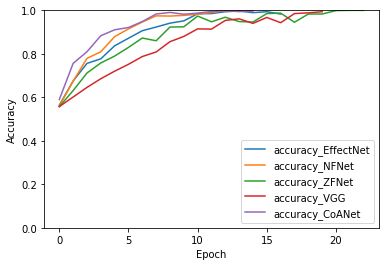

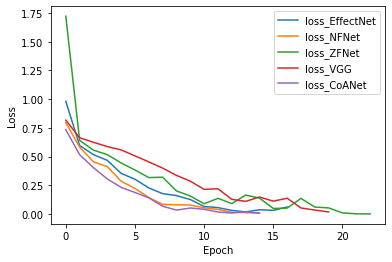

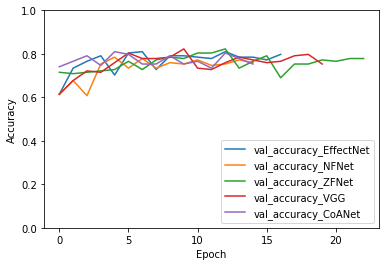

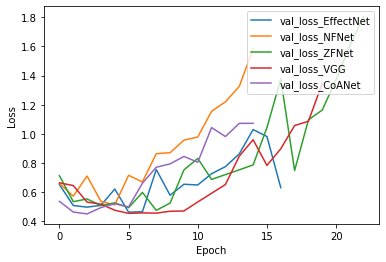

In [ ]:
#Plot the accuracy on the training history of the different models
def plot_history(history,element, isAcc = True, isLeUp = False):
  figure = plt.figure(figsize=(6, 4))
  for i in range(len(history)):
    plt.plot(history[i].history[element], label = element + '_' + models[i][1])
  plt.xlabel('Epoch')
  if isAcc :
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1])
    plt.legend(loc='lower right')
  else:
    plt.ylabel('Loss')
  if isLeUp :
    plt.legend(loc='upper right')
  else:
    plt.legend(loc='lower right')


plot_history(history,'accuracy')
plot_history(history,'loss',False,True)
plot_history(history,'val_accuracy')
plot_history(history,'val_loss',False,True)